In [1]:
import cv2
import numpy as np


# 0  car
# 1  human

X = []
y = []

for i in range(1,5001):
    image = cv2.imread("Dataset/car/car-"+str(i) + ".jpg")
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = cv2.resize(image, (227,227))
    Augment1 = cv2.flip(image, 1)
    a,Augment2 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    a,Augment3 = cv2.threshold(image,127,255,cv2.THRESH_TOZERO)
    X.append([image])
    X.append([Augment1])
    X.append([Augment2])
    X.append([Augment3])
    
for i in range(1,5001):
    image = cv2.imread("Dataset/human/human-"+str(i) + ".jpg")
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = cv2.resize(image, (227,227))
    Augment1 = cv2.flip(image, 1)
    a,Augment2 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    a,Augment3 = cv2.threshold(image,127,255,cv2.THRESH_TOZERO)
    X.append([image])
    X.append([Augment1]) 
    X.append([Augment2])
    X.append([Augment3])
    
    
for i in range(1,20001):
    y.append(0)#Car
for i in range(1,20001):
    y.append(1)#Human

X = np.array(X)
y = np.array(y)
    



In [2]:
X = X.reshape(-1,227,227,1)


from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test =train_test_split(X,y,test_size=0.05, shuffle = True) # %10 test

In [3]:
y_train.shape
X_train.shape

(38000, 227, 227, 1)

In [4]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
from keras.optimizers import Adam

# Sequential model
model = Sequential()

# 1.Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,1), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalization
model.add(BatchNormalization())

# 2. Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
#  Batch Normalization
model.add(BatchNormalization())

# 3. Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalization
model.add(BatchNormalization())

# 4. Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
#  Batch Normalization 
model.add(BatchNormalization())

# 5. Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
#  Batch Normalization 
model.add(BatchNormalization())

# Flatten
model.add(Flatten())
# 1. Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# droput for prevent overfitting.
model.add(Dropout(0.4))
#  Batch Normalization 
model.add(BatchNormalization())

# 2. Layer
model.add(Dense(4096)) 
model.add(Activation('relu'))
# droput for prevent overfitting.
model.add(Dropout(0.4))
#  Batch Normalization 
model.add(BatchNormalization())

#3. Layer
model.add(Dense(1000)) # Nodelar
model.add(Activation('relu'))
# Droput eklenmesi.
model.add(Dropout(0.4))
#  droput for prevent overfitting
model.add(BatchNormalization())

# Çıkış Katmanı
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        11712     
_________________________________________________________________
activation_1 (Activation)    (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)        

In [5]:
model.compile(optimizer="Adam",
             loss="binary_crossentropy",
             metrics = ["accuracy"])


In [6]:
model.fit(X_train, y_train,epochs= 10, batch_size = 128, validation_data = (X_test, y_test)) 

Train on 38000 samples, validate on 2000 samples
Epoch 1/10
38000/38000 [==============================] - 138s 4ms/step - loss: 0.3423 - accuracy: 0.8451 - val_loss: 1.1260 - val_accuracy: 0.7750
Epoch 2/10
38000/38000 [==============================] - 125s 3ms/step - loss: 0.1158 - accuracy: 0.9520 - val_loss: 0.2609 - val_accuracy: 0.9110
Epoch 3/10
38000/38000 [==============================] - 126s 3ms/step - loss: 0.0611 - accuracy: 0.9769 - val_loss: 0.3170 - val_accuracy: 0.8880
Epoch 4/10
38000/38000 [==============================] - 126s 3ms/step - loss: 0.0362 - accuracy: 0.9871 - val_loss: 0.7267 - val_accuracy: 0.8260
Epoch 5/10
38000/38000 [==============================] - 126s 3ms/step - loss: 0.0263 - accuracy: 0.9908 - val_loss: 0.0274 - val_accuracy: 0.9895
Epoch 6/10
38000/38000 [==============================] - 126s 3ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0112 - val_accuracy: 0.9970
Epoch 7/10
38000/38000 [==============================] - 126s 

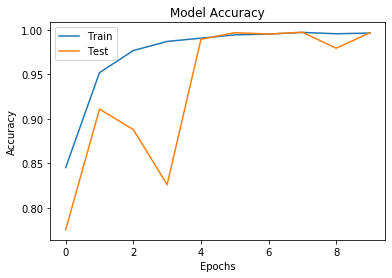

In [8]:
import matplotlib.pyplot as plt


plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train","Test"], loc= "upper left")
plt.show()

In [9]:
model.save('GTA(16.05.20)-10.h5')